In [2]:
# Load all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv(r"D:\Artificial_Intelligence\AI\Supervised_Learning\16_KMean\Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [27]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'predicted_clusters'],
      dtype='object')

In [28]:
sd=StandardScaler()
dataFrame=pd.DataFrame(sd.fit_transform(data),columns=data.columns)

In [29]:
dataFrame

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,predicted_clusters
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1.450365
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1.450365
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1.450365
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.519267
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1.450365
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-0.519267
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,-0.519267
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1.450365
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,-0.519267


In [33]:
km=KMeans(n_clusters=3,random_state=10)
predicted_cluster=km.fit(dataFrame)

In [34]:
predicted_cluster

KMeans(n_clusters=3, random_state=10)

In [35]:
data["predicted_clusters"]=predicted_cluster

In [36]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,predicted_clusters
0,2,3,12669,9656,7561,214,2674,1338,"KMeans(n_clusters=3, random_state=10)"
1,2,3,7057,9810,9568,1762,3293,1776,"KMeans(n_clusters=3, random_state=10)"
2,2,3,6353,8808,7684,2405,3516,7844,"KMeans(n_clusters=3, random_state=10)"
3,1,3,13265,1196,4221,6404,507,1788,"KMeans(n_clusters=3, random_state=10)"
4,2,3,22615,5410,7198,3915,1777,5185,"KMeans(n_clusters=3, random_state=10)"


In [37]:
data["predicted_clusters"].value_counts()

KMeans(n_clusters=3, random_state=10)    440
Name: predicted_clusters, dtype: int64

In [38]:
data1=data[data.predicted_clusters==0]
data2=data[data.predicted_clusters==1]
data3=data[data.predicted_clusters==2]

In [39]:
data1
data2
data3

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,predicted_clusters


In [59]:
sse=[]
for clusters in range(1,20):
    kmeans=KMeans(n_clusters=clusters)
    kmeans=kmeans.fit(dataFrame)
    sse.append(kmeans.inertia_)
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [60]:
sse

[3960.0000000000014,
 2777.552126091969,
 2147.6785841630867,
 1862.7839559460197,
 1548.229471015551,
 1330.2796685696321,
 1209.2293592849098,
 1081.3170925822456,
 1006.3986036693694,
 939.1495150362716,
 881.0349881595358,
 825.4601752894598,
 754.0197182795923,
 722.7526876944709,
 693.4065876785321,
 660.9520465378104,
 624.5357595804934,
 607.0979779743323,
 594.7222046222229]

Text(0, 0.5, 'SSE')

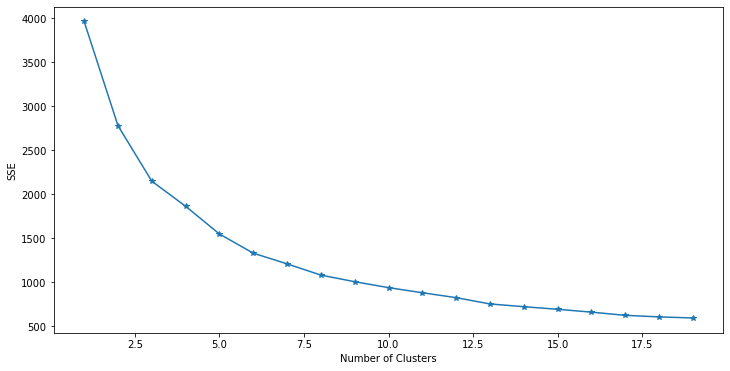

In [69]:
frame =pd.DataFrame({"Cluster":range(1,20),"SSE":sse})
plt.figure(figsize=(12,6))
plt.plot(frame["Cluster"],frame["SSE"],marker="*")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")